In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA


## To see column vise null values

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


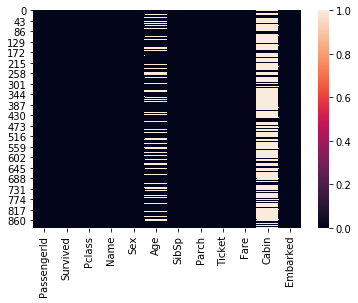

In [7]:
sns.heatmap(train.isnull())

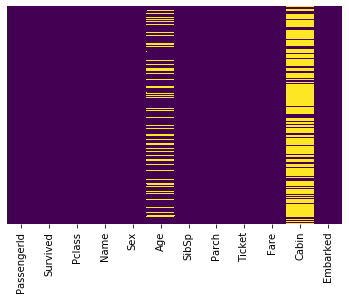

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

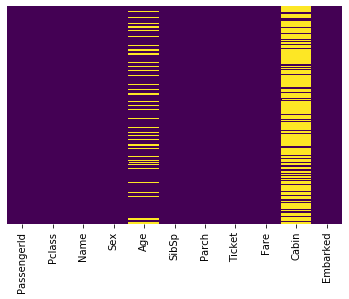

In [9]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False, cmap='viridis')    # test Data

### Survived vs Non Survived

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
sns.set_style('whitegrid')

Non Survived VS Survived


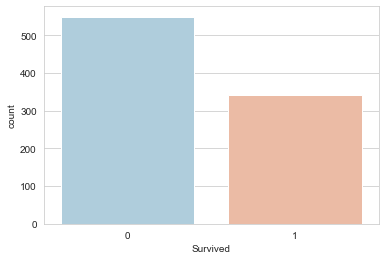

In [12]:
sns.countplot(x='Survived', data=train, palette='RdBu_r')
print('Non Survived VS Survived')

Non Survived VS Survived by Gender
Most of the people who survived were females


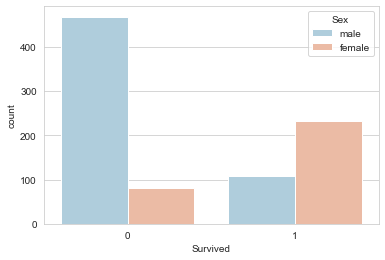

In [13]:
sns.countplot(x='Survived', data=train, palette='RdBu_r', hue='Sex')
print('Non Survived VS Survived by Gender')
print('Most of the people who survived were females')

Non Survived VS Survived by Pessenger Class
Most of the people who survived were from 1st Class
Moat people died were from 3rd class


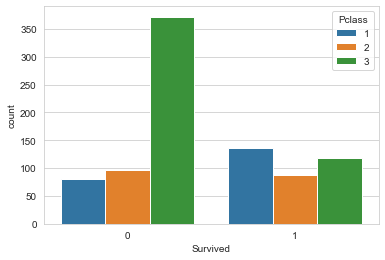

In [14]:
sns.countplot(x='Survived', data=train, hue='Pclass')
print('Non Survived VS Survived by Pessenger Class')
print('Most of the people who survived were from 1st Class')
print('Moat people died were from 3rd class')

Age of the people on the Titanic
There were little kids on the ship, then there is a decrese in passengers of age 8 to 15, after that curve is normal
This is a skwed curve


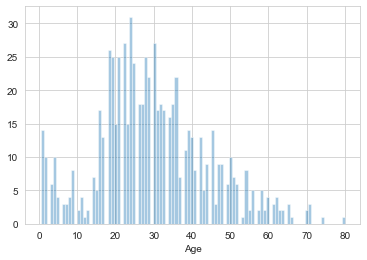

In [15]:
print('Age of the people on the Titanic')
sns.distplot(train['Age'].dropna(), kde=False, bins=100)
print('There were little kids on the ship, then there is a decrese in passengers of age 8 to 15, after that curve is normal')
print('This is a skwed curve')

Most of the people on ship, doesn't have a children or wife, then Comes the couples


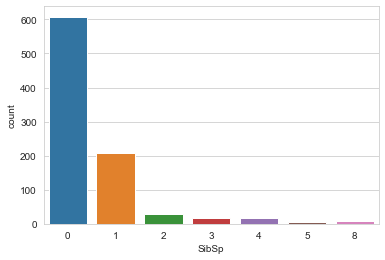

In [16]:
# Sibsp = number of siblings or wife and childrens
sns.countplot(x='SibSp', data=train)
print("Most of the people on ship, doesn't have a children or wife, then Comes the couples" )

How much people paid, as distribution
Most of tickets were in range of 0 to 50, That is because most people were from 3rd class


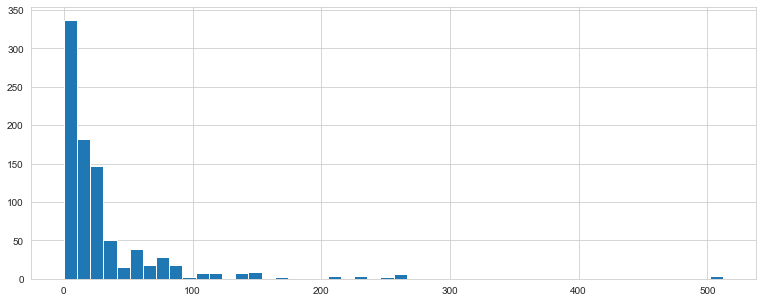

In [17]:
print('How much people paid, as distribution')
train['Fare'].hist(bins=50, figsize=(13,5))
print('Most of tickets were in range of 0 to 50, That is because most people were from 3rd class')

# We cannot apply figsize() in sns.distplot()